In [1]:
!pip install shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=4b5e35188aa23d915e3cd9d3a5f5a67d4bb1a0521bb0998bc20bdd3fe890f300
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [2]:
import shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/drive/MyDrive/dermatology_csv.csv')

In [6]:
data=data.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [8]:
data.shape

(366, 35)

In [9]:
data.size

12810

In [10]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [11]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [14]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [15]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')

In [16]:
data.drop_duplicates(keep='first',inplace=True)

In [17]:
data.shape

(358, 35)

In [18]:
import seaborn as sns

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


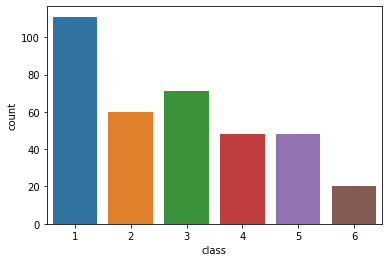

In [19]:
sns.countplot(data['class'])

In [20]:
data.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,0.173740,0.036039,0.071033,0.220784,-0.334604,0.025297,0.085688,-0.040812,0.214551,0.164601,0.023508,0.162065,0.172272,0.108256,-0.020583,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,0.187995,-0.080428,0.036771,0.273509,-0.371937,-0.106149,0.124884,0.033167,0.306889,0.326104,0.154432,0.323718,0.299116,0.179588,-0.090620,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,0.112793,0.305693,-0.142520,0.035561,-0.252761,-0.210341,0.213508,0.072985,0.368681,0.398286,0.226386,0.367492,0.248590,0.238679,0.285024,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,-0.139675,0.365353,0.100339,-0.137993,0.184312,0.213461,0.058731,-0.019349,-0.079079,-0.235030,-0.138078,-0.236290,-0.156881,-0.047784,0.369593,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,-0.093964,0.384412,-0.048038,-0.165916,-0.237857,0.141208,-0.038757,0.010014,-0.038782,0.017606,-0.152020,0.028212,-0.000663,0.160752,0.399235,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,-0.176255,0.911177,0.028623,-0.317031,-0.151269,0.380972,0.147099,-0.164093,-0.048675,-0.294115,-0.399858,-0.291233,-0.208546,-0.204090,0.884553,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,0.199582,-0.138781,-0.089868,-0.121734,0.027821,-0.010890,-0.098995,0.198391,-0.029260,-0.116229,-0.104694,-0.131709,-0.059200,-0.098317,-0.121232,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,-0.170058,0.870142,0.013077,-0.305885,-0.132867,0.360589,0.114945,-0.152957,-0.044011,-0.283775,-0.385800,-0.280994,-0.201214,-0.192845,0.885306,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,0.349222,-0.275952,-0.202487,0.333183,-0.229941,-0.532277,0.116932,0.239834,0.444443,0.725942,0.504374,0.643784,0.449353,0.516330,-0.271063,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,0.304867,-0.262591,-0.081709

In [21]:
y=data['class']
x=data.drop(columns='class')

In [22]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_index

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


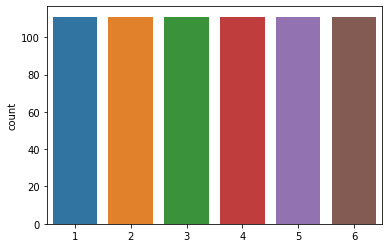

In [23]:
sns.countplot(y)

In [24]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
clf=XGBClassifier()
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:

#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 99.50%
Cross Validation Accuracy: 97.85% 


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'XGBClassifier')

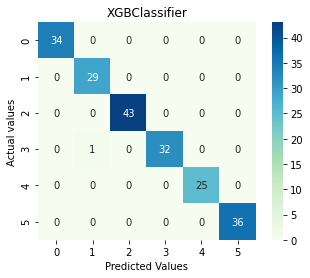

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('XGBClassifier')

In [30]:

from sklearn.metrics import classification_report
print('XGB Classifier')
print(classification_report(y_test, y_pred))

XGB Classifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.97      1.00      0.98        29
           3       1.00      1.00      1.00        43
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        36

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200



In [31]:
explainer=shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x)
expected_value = explainer.expected_value

In [32]:
print(shap_values)

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00168239],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00666594],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00168239],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00168239],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00168239],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00168239]], dtype=float32), array([[-0.00174897,  0.29205996, -0.00316137, ..., -0.07967589,
         0.        ,  0.01546616],
       [-0.00174897,  0.20003994, -0.0083793 , ..., -0.04620134,
         0.        ,  0.00972705],
       [-0.00174897,  0.18815185,  0.00343948, ..., -0.07435059,
         0.        ,  0.01376361],
       ...,
       [-0.00174897,  0.28190193,  0.00343948, ..., -0.07435059,
         0.        ,  0.02266

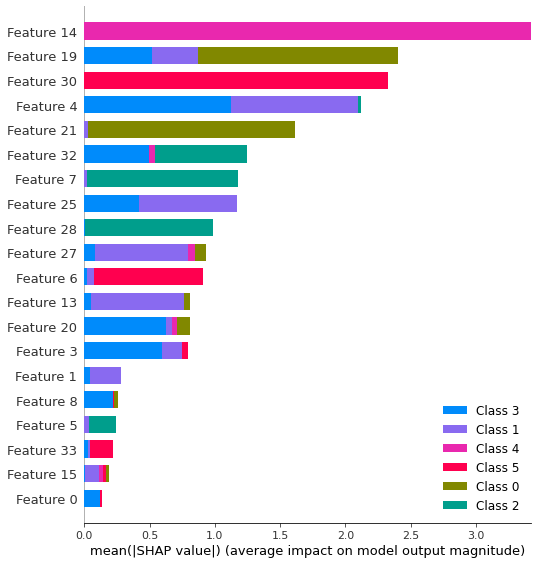

In [33]:
shap.summary_plot(shap_values, x)

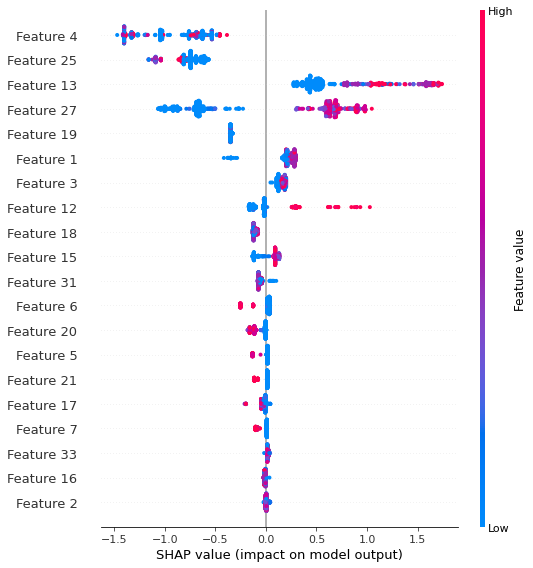

In [34]:
shap.summary_plot(shap_values[1], x)

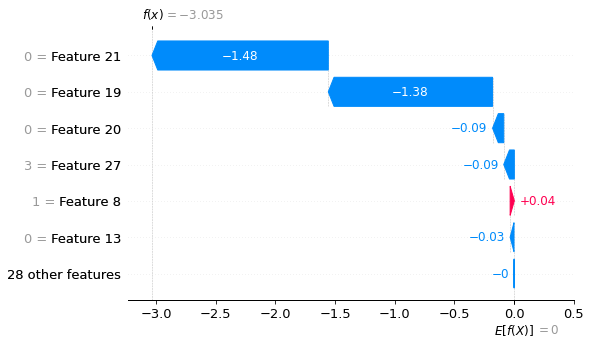

In [38]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(0,shap_values[0][0],x[0], max_display=7, show=True)

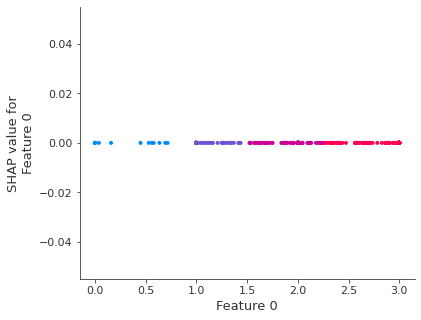

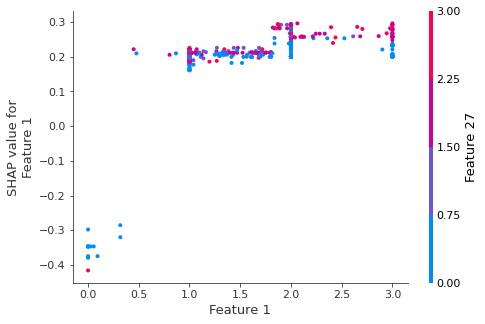

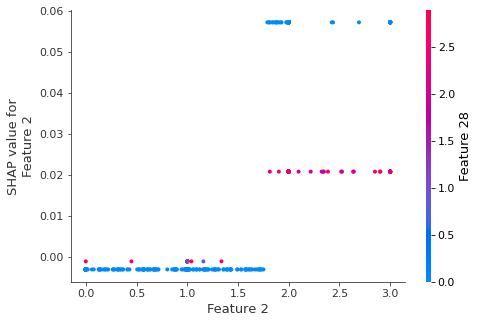

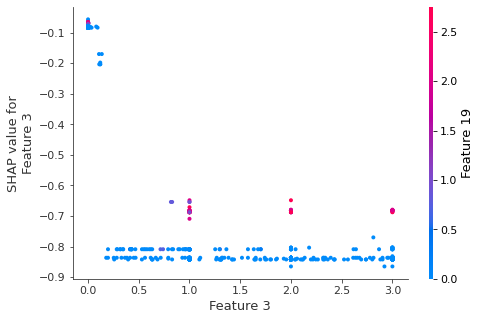

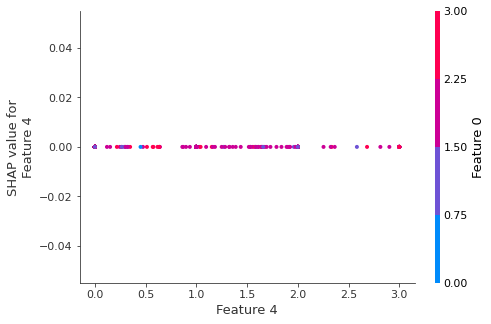

In [39]:
for i in range(5):
  shap.dependence_plot(i, shap_values[i], x)

In [40]:
# Generate force plot - Single
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x[0])

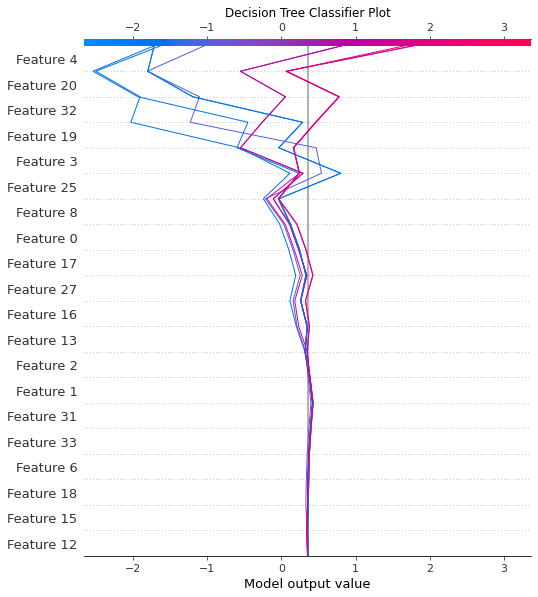

In [41]:
# Generate Decision plot 
shap.decision_plot(expected_value[0], shap_values[3][:10],features=x, show=True,title="Decision Tree Classifier Plot")

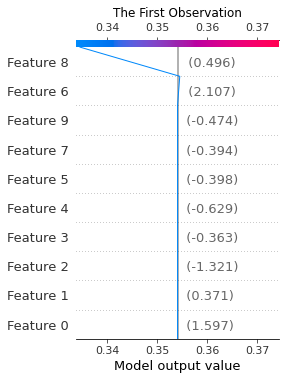

The Second Observation


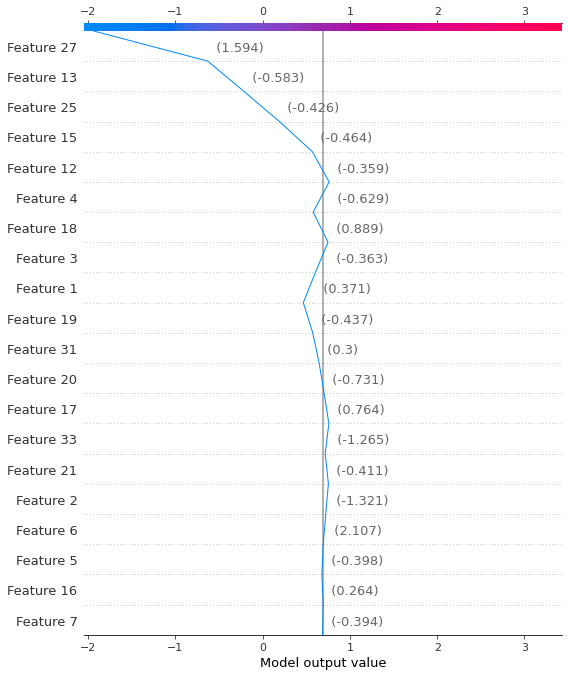

In [42]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(x_test)[0]
shap.decision_plot(expected_value[0], shap_values[3][:10], x_test, show=False)
ax1.title.set_text('The First Observation')
plt.show()
print("The Second Observation")
ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(x_test)[1]
shap.decision_plot(expected_value[1], shap_values[1], x_test, show=False)
ax2.title.set_text('The Second Observation')
plt.tight_layout()
plt.show()